# Clustering - Population Density


### Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

In [2]:
pop_df = pd.read_csv('./datasets/Nairobi_Area_Population_Grid.csv')
pop_df = pop_df.drop(columns='Unnamed: 0')

pop_df.head(3)

,Lat,Lon,Population
0,-1.050139,36.698194,4.18689
1,-1.050139,36.699306,4.18689
2,-1.050139,36.699583,4.18689


---
### Clean

In [3]:
# try to filter up to 4 or 5 to drop for Population
pop_gt_4 = pop_df[pop_df['Population']>4].copy()

---
### Model

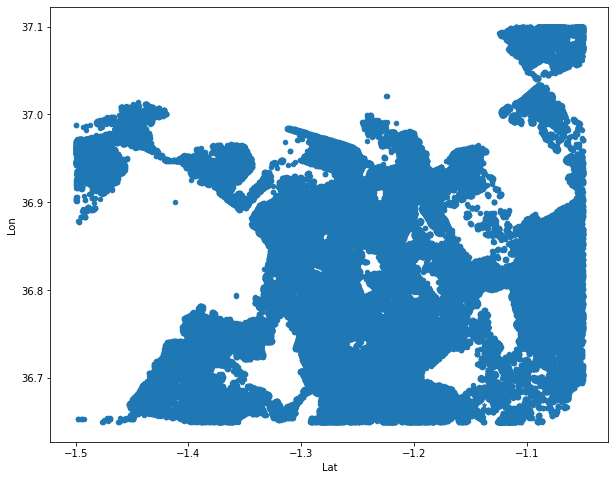

In [11]:
# X features from Latitude and Longitude
X = pop_gt_4.drop('Population', axis=1)

# fit kmeans model
km = KMeans(n_clusters=28, random_state=510)
km.fit(X)

pop_gt_4['clusters'] = km.labels_
centroids = pop_gt_4.groupby('clusters')[['Lat', 'Lon']].mean()
    
# Plot scatter by cluster / color, and centroids
#colors = [(x/10.0, x/20.0, 0.75) for x in range(28)]
#pop_gt_4['color'] = pop_gt_4['clusters'].map(lambda p: colors[p])

ax = X.plot(    
    kind="scatter", 
    x='Lat', y='Lon',
    figsize=(10,8),
    #c = pop_gt_4['color']
)

centroids.plot(
    kind="scatter", 
    x="Lat", y="Lon", 
    marker="*", #c=[(x/10.0, x/20.0, 0.75) for x in range(len(28))], s=550,
    ax=ax
);

In [12]:
silhouette_score(X.head(20_000), km.labels_[:20_000])

0.988874656212865

In [13]:
pop_gt_4.groupby('clusters')[['Lat', 'Lon']].mean()

,Lat,Lon
clusters,,
0,-1.207695,36.875717
1,-1.480635,36.950068
2,-1.276820,36.740696
3,-1.264971,36.683754
4,-1.301778,36.786201
5,-1.267139,36.946447
6,-1.314394,36.890223
7,-1.414819,36.693547
8,-1.372299,36.938266


In [14]:
pop_gt_4.groupby('clusters')['Population'].mean().sort_values(ascending=False)

clusters
15    104.363850
6      49.700944
13     42.291724
5      39.948168
2      36.169043
4      33.249166
16     23.824825
0      20.531028
19     16.712763
20     14.295680
22     13.985396
3      12.801498
24     12.224217
11     11.200338
21     11.029175
12     10.966820
23     10.050672
8       9.244917
14      8.836380
7       7.703288
9       7.653544
26      6.789173
25      6.786063
17      6.375374
27      6.290614
10      6.268175
18      5.144413
1       4.889093
Name: Population, dtype: float64

In [16]:
pop_gt_4.to_csv('./datasets/Nairobi_Area_Population_Clusters.csv')